In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')
df = data.copy()

In [ ]:
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
print('The Shape of Data:',df.shape)

The Shape of Data: (2823, 25)


In [ ]:
df['ORDERDATE'] = df['ORDERDATE'].astype(str).str.replace("-", "/", regex=True)

In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.set_index('ORDERDATE', inplace=True)


In [ ]:
numerical_df =  df.select_dtypes(include=['int64','float64'])
categorical_df = df.select_dtypes(include=['object'])

In [ ]:
numerical_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERDATE,,,,,,,,,
2003-02-24,10107,30,95.70,2,2871.00,1,2,2003,95
2003-05-07,10121,34,81.35,5,2765.90,2,5,2003,95
2003-07-01,10134,41,94.74,2,3884.34,3,7,2003,95
2003-08-25,10145,45,83.26,6,3746.70,3,8,2003,95
2003-10-10,10159,49,100.00,14,5205.27,4,10,2003,95


In [ ]:
numerical_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')

In [ ]:
import plotly.express as px

In [ ]:
df_grouped = df.groupby('YEAR_ID', as_index=False)['SALES'].sum()

In [ ]:
fig = px.bar(df_grouped, x='YEAR_ID',y = 'SALES', title = "Sales per years",labels={'YEAR_ID': 'Year', 'SALES': 'Total Sales'},color='SALES')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
df_grouped = df.groupby('YEAR_ID', as_index=False)['QUANTITYORDERED'].sum()

In [ ]:
fig = px.bar(df_grouped, x='YEAR_ID',y = 'QUANTITYORDERED', title = "Quantity ordered per years",labels={'YEAR_ID': 'Year', 'QUANTITYORDERED': 'Total Quantity Order '},color='QUANTITYORDERED')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
fix = px.scatter(numerical_df , x = 'PRICEEACH',y = 'QUANTITYORDERED',title = 'Scatter Plot of Quantity Order and Price of Each components', labels = {'QUANTITYORDERED':'Quantity Ordered','PRICEEACH':'Price Each'},color_continuous_scale="Turbo")
fix.update_layout(width=800, height=400)
fix.show()

In [ ]:
df_grouped = df.groupby('MONTH_ID', as_index=False)['QUANTITYORDERED'].sum()
fig = px.bar(df_grouped, x='MONTH_ID',y = 'QUANTITYORDERED', title = "Quantity ordered per Months",labels={'MONTH_ID': 'Month', 'QUANTITYORDERED': 'Total Quantity Order '},color='QUANTITYORDERED')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
df_grouped = df.groupby('MONTH_ID', as_index=False)['SALES'].sum()
fig = px.bar(df_grouped, x='MONTH_ID',y = 'SALES', title = "Sales per Months",labels={'MONTH_ID': 'Month', 'SALES': 'Sales per month '},color='SALES')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
df_grouped = df.groupby(['YEAR_ID', 'MONTH_ID'], as_index=False)['QUANTITYORDERED'].sum()
fig = px.bar(df_grouped, x='MONTH_ID',y = 'QUANTITYORDERED', title = "Quantity order per Months",labels={'MONTH_ID': 'Month', 'QUANTITYORDERED': 'Total Quantity Ordered', 'YEAR_ID': 'Year'},color='YEAR_ID',barmode='group',text='QUANTITYORDERED')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
df_grouped = df.groupby(['YEAR_ID', 'MONTH_ID'], as_index=False)['SALES'].sum()
fig = px.bar(df_grouped, x='MONTH_ID',y = 'SALES', title = "Sales per Months",labels={'MONTH_ID': 'Month', 'SALES': 'Sales per month', 'YEAR_ID': 'Year'},color='YEAR_ID',barmode='group',text='SALES')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
df_grouped = df.groupby(['YEAR_ID', 'QTR_ID'], as_index=False)['SALES'].sum()
fig = px.bar(df_grouped, x='QTR_ID',y = 'SALES', title = "Sales in total Qauter",labels={'QTR_ID': 'Quater_id', 'SALES': 'Sales per month', 'YEAR_ID': 'Year'},color='YEAR_ID',barmode='group',text='SALES')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
df_grouped = df.groupby(['YEAR_ID', 'QTR_ID'], as_index=False)['QUANTITYORDERED'].sum()
fig = px.bar(df_grouped, x='QTR_ID',y = 'QUANTITYORDERED', title = "Quantity in total Orders",labels={'QTR_ID': 'Quater_id', 'QUANTITYORDEREDL': 'Quantity order', 'YEAR_ID': 'Year'},color='YEAR_ID',barmode='group',text='QUANTITYORDERED')
fig.update_layout(width=800, height=400)
fig.show()

In [ ]:
numerical_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERDATE,,,,,,,,,
2003-02-24,10107,30,95.70,2,2871.00,1,2,2003,95
2003-05-07,10121,34,81.35,5,2765.90,2,5,2003,95
2003-07-01,10134,41,94.74,2,3884.34,3,7,2003,95
2003-08-25,10145,45,83.26,6,3746.70,3,8,2003,95
2003-10-10,10159,49,100.00,14,5205.27,4,10,2003,95


In [ ]:
fix = px.scatter(numerical_df , x = 'QTR_ID',y = 'QUANTITYORDERED',title = 'Scatter Plot of Quantity Order and Quater_id', labels = {'QUANTITYORDERED':'Quantity Ordered','QTR_ID':'Quater_id'},color_continuous_scale="Turbo")
fix.update_layout(width=800, height=400)
fix.show()

In [ ]:
fix = px.scatter(numerical_df , x = 'QTR_ID',y = 'SALES',title = 'Scatter Plot of Sales and Quater_id', labels = {'SALES':'Sales','QTR_ID':'Quater_id'},color_continuous_scale="Turbo")
fix.update_layout(width=800, height=400)
fix.show()

In [ ]:
fix = px.scatter(numerical_df , x = 'MONTH_ID',y = 'SALES',title = 'Scatter Plot of Sales and Month_id', labels = {'SALES':'Sales','MONTH_ID':'Month_id'},color_continuous_scale="Turbo")
fix.update_layout(width=800, height=400)
fix.show()

In [ ]:
fix = px.scatter(numerical_df , x = 'MONTH_ID',y = 'QUANTITYORDERED',title = 'Scatter Plot of Quantity Order and Month_id', labels = {'QUANTITYORDERED':'Quantity Ordered','MONTH_ID':'Month_id'},color_continuous_scale="Turbo")
fix.update_layout(width=800, height=400)
fix.show()

In [ ]:
categorical_df.head(5)

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,
2003-02-24,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
2003-05-07,Shipped,Motorcycles,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2003-07-01,Shipped,Motorcycles,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
2003-08-25,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
2003-10-10,Shipped,Motorcycles,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


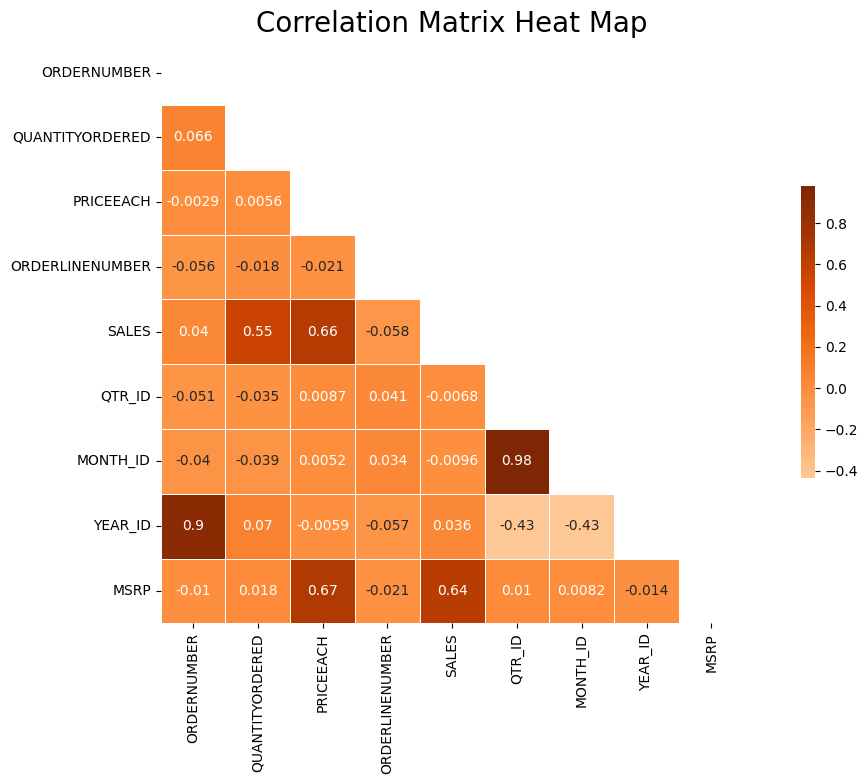

In [ ]:
Matrix_corr = numerical_df.corr()
Matrix_corr['SALES'].sort_values(ascending=False)
mask = np.triu(np.ones_like(Matrix_corr))
f=plt.figure(figsize=(12,8))
graph = sns.heatmap(Matrix_corr,mask=mask,cmap=plt.get_cmap("Oranges"),center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5},annot = True)
graph.set_title("Correlation Matrix Heat Map",fontsize = 20)
sns.set(font_scale = 1)
f.tight_layout()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(rows=5, cols=1, subplot_titles=['STATUS', 'PRODUCTLINE', 'CITY', 'COUNTRY', 'DEALSIZE'])
categories = ['STATUS', 'PRODUCTLINE', 'CITY', 'COUNTRY', 'DEALSIZE']
for i, cat in enumerate(categories):
    cat_counts = categorical_df[cat].value_counts().reset_index()
    cat_counts.columns = [cat, 'COUNT']
    fig.add_trace(
        go.Bar(x=cat_counts[cat], y=cat_counts['COUNT'], name=cat),
        row=i+1, col=1
    )
fig.update_layout(height=1200, width=800, title_text="Counts of Categories in Subplots", showlegend=False)
fig.show()


In [ ]:
for i, category in enumerate(categories):
    grouped_df = df.groupby(category, as_index=False)['SALES'].sum()
    fig.add_trace(go.Bar(x=grouped_df[category], y=grouped_df['SALES'], name=category), row=i+1, col=1)

# Update layout
fig.update_layout(height=1200, width=800, title_text="Subplots for 5 Categorical Features and Sales", showlegend=False)

fig.show()

In [ ]:
for i, category in enumerate(categories):
    grouped_df = df.groupby(category, as_index=False)['QUANTITYORDERED'].sum()
    fig.add_trace(go.Bar(x=grouped_df[category], y=grouped_df['QUANTITYORDERED'], name=category), row=i+1, col=1)

# Update layout
fig.update_layout(height=1200, width=800, title_text="Subplots for 5 Categorical Features and Quantity Ordered", showlegend=False)
fig.show()

In [ ]:
categorical_df.isnull().sum()

,0
STATUS,0
PRODUCTLINE,0
PRODUCTCODE,0
CUSTOMERNAME,0
PHONE,0
ADDRESSLINE1,0
ADDRESSLINE2,2521
CITY,0
STATE,1486
POSTALCODE,76


In [ ]:
fig = make_subplots(rows=3, cols=1, subplot_titles=['STATE', 'TERRITORY', 'POSTALCODE',])
categories = ['STATE', 'TERRITORY', 'POSTALCODE']
for i, cat in enumerate(categories):
    cat_counts = categorical_df[cat].value_counts().reset_index()
    cat_counts.columns = [cat, 'COUNT']
    fig.add_trace(
        go.Bar(x=cat_counts[cat], y=cat_counts['COUNT'], name=cat),
        row=i+1, col=1
    )
fig.update_layout(height=1200, width=800, title_text="Counts of Categories in Subplots", showlegend=False)
fig.show()


In [ ]:
df['STATE'] = df['STATE'].fillna(df['STATE'].mode()[0])
df['TERRITORY'] = df['TERRITORY'].fillna(df['TERRITORY'].mode()[0])
df['POSTALCODE'] = df['POSTALCODE'].fillna(df['POSTALCODE'].mode()[0])

In [ ]:
df=df.drop(['ADDRESSLINE2'],axis=1)

In [ ]:
categorical_df['CUSTOMERNAME'].value_counts()[0:10]

,count
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
Land of Toys Inc.,49
Rovelli Gifts,48
Muscle Machine Inc,48
Souveniers And Things Co.,46


In [ ]:
customer_counts = df.groupby(['CUSTOMERNAME', 'COUNTRY']).size().reset_index(name='QUANTITYORDERED')
top_10 = customer_counts.sort_values(by='QUANTITYORDERED', ascending=False).head(10)
fig = px.bar(top_10,x='CUSTOMERNAME',y='QUANTITYORDERED',color='COUNTRY',text='QUANTITYORDERED',title='Top 10 Customers and Their Countries (by Frequency)')
fig.update_layout(xaxis_tickangle=45, width=900, height=500)
fig.show()

In [ ]:
customer_counts = df.groupby(['CUSTOMERNAME', 'COUNTRY']).size().reset_index(name='SALES')
top_10 = customer_counts.sort_values(by='SALES', ascending=False).head(10)
fig = px.bar(top_10,x='CUSTOMERNAME',y='SALES',color='COUNTRY',text='SALES',title='Top 10 Customers and Their Countries (by Frequency)')
fig.update_layout(xaxis_tickangle=45, width=900, height=500)
fig.show()

In [ ]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-02-24,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
2003-05-07,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,26.47.1555,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2003-07-01,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
2003-08-25,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
2003-10-10,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,6505551386,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


In [ ]:
categorical_df.head(5)

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,
2003-02-24,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
2003-05-07,Shipped,Motorcycles,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2003-07-01,Shipped,Motorcycles,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
2003-08-25,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
2003-10-10,Shipped,Motorcycles,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df_grouped = df.groupby(['CUSTOMERNAME', 'PRODUCTLINE']).size().reset_index(name='COUNT')[0:10]
fig = px.bar(df_grouped, x='CUSTOMERNAME', y='COUNT', color='PRODUCTLINE', barmode='group', title='Count of Product Lines by Status')
fig.show()

In [ ]:
crosstab_df = pd.crosstab(df['CUSTOMERNAME'], df['PRODUCTLINE'])
crosstab_df[0:10]

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",19,0,0,7,3,0,22
Alpha Cognac,4,0,6,7,0,0,3
Amica Models & Co.,4,0,0,3,1,1,17
"Anna's Decorations, Ltd",24,6,0,0,0,9,7
Atelier graphique,4,2,0,0,0,0,1
"Australian Collectables, Ltd",3,0,2,1,0,0,17
"Australian Collectors, Co.",12,14,13,0,0,4,12
"Australian Gift Network, Co",4,4,2,0,1,2,2
Auto Assoc. & Cie.,2,0,0,0,0,4,12


In [ ]:
crosstab_df = pd.crosstab(df['COUNTRY'], df['PRODUCTLINE'])
crosstab_df[0:10]

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,53,26,25,2,1,20,58
Austria,25,5,6,4,0,5,10
Belgium,4,0,1,11,3,0,14
Canada,14,1,10,14,0,16,15
Denmark,34,0,2,14,4,2,7
Finland,38,13,12,9,2,11,7
France,98,68,32,21,7,30,58
Germany,36,3,8,2,2,2,9
Ireland,6,2,4,0,2,1,1


In [ ]:
crosstab_df = pd.crosstab(index=[df['COUNTRY'], df['STATE']], columns=df['PRODUCTLINE'],values=df['ORDERNUMBER'],aggfunc='count').fillna(0)
crosstab_df

PRODUCTLINE                Classic Cars  Motorcycles  Planes  Ships  Trains  \
COUNTRY     STATE                                                             
Australia   NSW                    34.0          8.0     8.0    1.0     0.0   
            Queensland              4.0          4.0     2.0    0.0     1.0   
            Victoria               15.0         14.0    15.0    1.0     0.0   
Austria     CA                     25.0          5.0     6.0    4.0     0.0   
Belgium     CA                      4.0          0.0     1.0   11.0     3.0   
Canada      BC                      6.0          1.0    10.0    8.0     0.0   
            Quebec                  8.0          0.0     0.0    6.0     0.0   
Denmark     CA                     34.0          0.0     2.0   14.0     4.0   
Finland     CA                     38.0         13.0    12.0    9.0     2.0   
France      CA                     98.0         68.0    32.0   21.0     7.0   
Germany     CA                     36.0          3.0     8.0    2.0     2.0   
Ireland     CA                      6.0          2.0     4.0    0.0     2.0   
Italy       CA                     28.0          2.0    31.0    6.0     3.0   
Japan       Osaka                   3.0          5.0    10.0    0.0     0.0   
            Tokyo                   5.0          4.0     6.0    5.0     2.0   
Norway      CA                     35.0         14.0    11.0    0.0     2.0   
Philippines CA                     13.0          7.0     5.0    0.0     0.0   
Singapore   CA                     32.0          1.0     0.0    4.0     5.0   
Spain       CA                    120.0         19.0    30.0   39.0    14.0   
Sweden      CA                     17.0          3.0     3.0   10.0     1.0   
Switzerland CA                     31.0          0.0     0.0    0.0     0.0   
UK          CA                     45.0          9.0     6.0   15.0     3.0   
            Isle of Wight           1.0          0.0     9.0    8.0     1.0   
USA         CA                    116.0         54.0    37.0   24.0     8.0   
            CT                     20.0         10.0    15.0    2.0     4.0   
            MA                     59.0         29.0    19.0   27.0     4.0   
            NH                     18.0          0.0     0.0    0.0     0.0   
            NJ                      0.0          7.0     9.0    2.0     0.0   
            NV                     20.0          0.0     0.0    0.0     0.0   
            NY                     68.0         36.0    10.0   13.0     7.0   
            PA                     28.0         13.0     5.0    2.0     2.0   

PRODUCTLINE                Trucks and Buses  Vintage Cars  
COUNTRY     STATE                                          
Australia   NSW                        14.0          27.0  
            Queensland                  2.0           2.0  
            Victoria                    4.0          29.0  
Austria     CA                          5.0          10.0  
Belgium     CA                          0.0          14.0  
Canada      BC                         11.0          12.0  
            Quebec                      5.0           3.0  
Denmark     CA                          2.0           7.0  
Finland     CA                         11.0           7.0  
France      CA                         30.0          58.0  
Germany     CA                          2.0           9.0  
Ireland     CA                          1.0           1.0  
Italy       CA                          2.0          41.0  
Japan       Osaka                       0.0           2.0  
            Tokyo                       3.0           7.0  
Norway      CA                          9.0          14.0  
Philippines CA                          0.0           1.0  
Singapore   CA                         23.0          14.0  
Spain       CA                         46.0          74.0  
Sweden      CA                         11.0          12.0  
Switzerland CA                          0.0           0.0  
UK          

In [ ]:
grouped_counts = df.groupby(['COUNTRY', 'STATE', 'PRODUCTLINE']).size().reset_index(name='COUNT')
grouped_counts

,COUNTRY,STATE,PRODUCTLINE,COUNT
0,Australia,NSW,Classic Cars,34
1,Australia,NSW,Motorcycles,8
2,Australia,NSW,Planes,8
3,Australia,NSW,Ships,1
4,Australia,NSW,Trucks and Buses,14
...,...,...,...,...
172,USA,PA,Planes,5
173,USA,PA,Ships,2
174,USA,PA,Trains,2
175,USA,PA,Trucks and Buses,13


In [ ]:
crosstab_df_4 = pd.crosstab(df['COUNTRY'], df['DEALSIZE'])
crosstab_df_4
fig = px.imshow(crosstab_df_4,text_auto = True)
fig.show()

In [ ]:
crosstab_df_5 = pd.crosstab(df['CUSTOMERNAME'], df['DEALSIZE'])
fig = px.imshow(crosstab_df_5[0:15],text_auto = True)
fig.show()

In [ ]:
crosstab_df_6 = pd.crosstab(df['CUSTOMERNAME'], df['QTR_ID'])
fig = px.imshow(crosstab_df_6[0:15],text_auto = True)
fig.show()

In [ ]:
crosstab_df_7 = pd.crosstab(df['COUNTRY'], df['QTR_ID'])
fig = px.imshow(crosstab_df_7[0:15],text_auto = True)
fig.show()

In [ ]:
import plotly.graph_objects as go
crosstab_df_8 = pd.crosstab(df['COUNTRY'],df['MONTH_ID'])
fig = make_subplots(rows=2, cols=1,subplot_titles = ('Country ordering in Months','Customer ordering in Months'))
fig.add_trace(
    go.Heatmap(z=crosstab_df_8.values, x=crosstab_df_8.columns, y=crosstab_df_8.index, colorscale='Viridis',text=crosstab_df_8.values,texttemplate="%{text}"),
    row=1, col=1
)
fig.update_xaxes(title_text="Months", row=1, col=1)
fig.update_yaxes(title_text="Country", row=1, col=1)
crosstab_df_9 = pd.crosstab(df['CUSTOMERNAME'], df['MONTH_ID'])[0:10]
fig.add_trace(
    go.Heatmap(z = crosstab_df_9.values, x=crosstab_df_9.columns, y = crosstab_df_9.index,text = crosstab_df_9.values, texttemplate = "%{text}"),
    row=2, col=1
)
fig.update_xaxes(title_text = 'Months', row=2, col=1)
fig.update_yaxes(title_text = 'Customer',row=2, col=1)
crosstab_df_10 = pd.crosstab(df['CUSTOMERNAME'], df['MONTH_ID'])[0:10]
fig.add_trace(
    go.Heatmap(z = crosstab_df_9.values, x=crosstab_df_9.columns, y = crosstab_df_9.index,text = crosstab_df_9.values, texttemplate = "%{text}"),
    row=2, col=1
)
fig.update_xaxes(title_text = 'Months', row=2, col=1)
fig.update_yaxes(title_text = 'Customer',row=2, col=1)
fig.update_layout(height=800, width=1000, title_text="Side By Side Subplots")
fig.show()


In [ ]:
df_grouped_ht = df.groupby(['COUNTRY','MONTH_ID'])['SALES'].sum().reset_index()
heatmap_data = df_grouped_ht.pivot_table(index='COUNTRY',columns = 'MONTH_ID',values='SALES')
fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,x=heatmap_data.columns,y=heatmap_data.index,colorscale='Blues',text=heatmap_data.values,texttemplate='%{text:.0f}'))
fig.update_layout(height=1000, width=1200,title = 'Total sales by Countries in each Months',xaxis_title='Month',yaxis_title='Country')
fig.show()

In [ ]:
df_grouped_ht = df.groupby(['CUSTOMERNAME','MONTH_ID'])['SALES'].sum().reset_index()
heatmap_data = df_grouped_ht.pivot_table(index='CUSTOMERNAME',columns = 'MONTH_ID',values='SALES')
fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,x=heatmap_data.columns,y=heatmap_data.index,colorscale='Blues',text=heatmap_data.values,texttemplate='%{text:.0f}'))
fig.update_layout(height=1000, width=1200,title = 'Total sales by Top 10 Customer in each Months',xaxis_title='Month',yaxis_title='Customer Name')
fig.show()

In [ ]:
df_grouped_ht = df.groupby(['COUNTRY','QTR_ID'])['SALES'].sum().reset_index()
heatmap_data = df_grouped_ht.pivot_table(index='COUNTRY',columns = 'QTR_ID',values='SALES')
fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,x=heatmap_data.columns,y=heatmap_data.index,colorscale='Blues',text=heatmap_data.values,texttemplate='%{text:.0f}'))
fig.update_layout(height=800, width=1000,title = 'Total sales by Countries in each Quater',xaxis_title='Quater',yaxis_title='Country')
fig.show()

In [ ]:
df_grouped_ht = df.groupby(['CUSTOMERNAME','QTR_ID'])['SALES'].sum().reset_index()
heatmap_data = df_grouped_ht.pivot_table(index='CUSTOMERNAME',columns = 'QTR_ID',values='SALES')
fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,x=heatmap_data.columns,y=heatmap_data.index,colorscale='Blues',text=heatmap_data.values,texttemplate='%{text:.0f}'))
fig.update_layout(height=800, width=1000,title = 'Total sales by Customers in each Quater',xaxis_title='Quater',yaxis_title='CUSTOMERNAME')
fig.show()

In [ ]:
crosstab_df_10 = pd.crosstab(df['COUNTRY'], df['STATE'])
fig = px.imshow(crosstab_df_10,text_auto = True)
fig.show()

In [ ]:
crosstab_df = pd.crosstab(index = df['COUNTRY'],columns=df['STATE'],values = df['SALES'],aggfunc = 'sum', normalize = False).fillna(0)
fig = go.Figure(data=go.Heatmap(z=crosstab_df.values,x=crosstab_df.columns,y=crosstab_df.index,colorscale='Viridis',text=crosstab_df.values,texttemplate="%{text:.2f}",  ))
fig.update_layout(title='Sales by Country and State',xaxis_title='State',yaxis_title='Country')
fig.show()

In [ ]:
grouped_df=df.groupby(['COUNTRY','STATE','MONTH_ID'], as_index=False)['SALES'].sum()
pivot_df=grouped_df.pivot_table(index=['COUNTRY','STATE'],columns='MONTH_ID',values='SALES',aggfunc='sum',fill_value=0)
pivot_df_reset = pivot_df.reset_index()
pivot_df_reset['LOCATION'] = pivot_df_reset['COUNTRY'] + ' - ' + pivot_df_reset['STATE']
heatmap_df = pivot_df_reset.drop(columns=['COUNTRY', 'STATE']).set_index('LOCATION')
fig = px.imshow(
    heatmap_df,
    labels=dict(x="Month", y="Country - State", color="Sales"),
    text_auto='.2s',
    aspect="auto",
    color_continuous_scale='Blues'
)

fig.update_layout(title="Monthly Sales by Country and State", height=600)
fig.show()

In [ ]:
grouped_df=df.groupby(['COUNTRY','STATE','QTR_ID'], as_index=False)['SALES'].sum()
pivot_df=grouped_df.pivot_table(index=['COUNTRY','STATE'],columns='QTR_ID',values='SALES',aggfunc='sum',fill_value=0)
pivot_df
pivot_df_reset = pivot_df.reset_index()
pivot_df_reset['LOCATION'] = pivot_df_reset['COUNTRY'] + ' - ' + pivot_df_reset['STATE']
heatmap_df = pivot_df_reset.drop(columns=['COUNTRY', 'STATE']).set_index('LOCATION')
fig = px.imshow(
    heatmap_df,
    labels=dict(x="Quater", y="Country - State", color="Sales"),
    text_auto='.2s',
    aspect="auto",
    color_continuous_scale='Blues'
)

fig.update_layout(title="Quaterly Sales by Country and State", height=600)
fig.show()

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [ ]:
crosstab_df_city = pd.crosstab(index=[df['COUNTRY'], df['CITY']], columns=df['PRODUCTLINE'],values=df['ORDERNUMBER'],aggfunc='count').fillna(0)
crosstab_df_city

PRODUCTLINE               Classic Cars  Motorcycles  Planes  Ships  Trains  \
COUNTRY   CITY                                                               
Australia Chatswood               10.0          2.0     8.0    1.0     0.0   
          Glen Waverly             3.0          0.0     2.0    1.0     0.0   
          Melbourne               12.0         14.0    13.0    0.0     0.0   
          North Sydney            24.0          6.0     0.0    0.0     0.0   
          South Brisbane           4.0          4.0     2.0    0.0     1.0   
...                                ...          ...     ...    ...     ...   
USA       San Diego                8.0          0.0     6.0    7.0     0.0   
          San Francisco           11.0         18.0     0.0    2.0     0.0   
          San Jose                10.0          2.0    13.0    2.0     0.0   
          San Rafael              67.0         10.0     0.0   10.0     8.0   
          White Plains             5.0          5.0     9.0    0.0     1.0   

PRODUCTLINE               Trucks and Buses  Vintage Cars  
COUNTRY   CITY                                            
Australia Chatswood                    5.0          20.0  
          Glen Waverly                 0.0          17.0  
          Melbourne                    4.0          12.0  
          North Sydney                 9.0           7.0  
          South Brisbane               2.0           2.0  
...                                    ...           ...  
USA       San Diego                    0.0           4.0  
          San Francisco                6.0          25.0  
          San Jose                     0.0          13.0  
          San Rafael                  36.0          49.0  
          White Plains                 4.0           2.0  

[73 rows x 7 columns]

In [ ]:
crosstab_df_city_plot = pd.crosstab(index = df['COUNTRY'],columns=df['CITY'],values = df['SALES'],aggfunc = 'sum', normalize = False).fillna(0)
crosstab_df_city_plot

CITY,Aaarhus,Allentown,Barcelona,Bergamo,Bergen,Boras,Boston,Brickhaven,Bridgewater,Brisbane,...,Singapore,South Brisbane,Stavern,Strasbourg,Torino,Toulouse,Tsawassen,Vancouver,Versailles,White Plains
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Australia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,59469.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Austria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Belgium,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Canada,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,74634.85,75238.92,0.00,0.00
Denmark,100595.55,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Finland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
France,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,80438.48,0.00,70488.44,0.00,0.00,64834.32,0.00
Germany,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ireland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
crosstab_df_city_plot_order = pd.crosstab(index = df['COUNTRY'],columns=df['CITY'],values = df['QUANTITYORDERED'],aggfunc = 'sum', normalize = False).fillna(0)
crosstab_df_city_plot_order

CITY,Aaarhus,Allentown,Barcelona,Bergamo,Bergen,Boras,Boston,Brickhaven,Bridgewater,Brisbane,...,Singapore,South Brisbane,Stavern,Strasbourg,Torino,Toulouse,Tsawassen,Vancouver,Versailles,White Plains
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,873.0,703.0,0.0,0.0
Denmark,882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,779.0,0.0,687.0,0.0,0.0,637.0,0.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ireland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
crosstab_df_city_customer = pd.crosstab(index=[df['COUNTRY'], df['CITY']], columns=df['CUSTOMERNAME'],values=df['ORDERNUMBER'],aggfunc='count').fillna(0)
crosstab_df_city_customer

CUSTOMERNAME              AV Stores, Co.  Alpha Cognac  Amica Models & Co.  \
COUNTRY   CITY                                                               
Australia Chatswood                  0.0           0.0                 0.0   
          Glen Waverly               0.0           0.0                 0.0   
          Melbourne                  0.0           0.0                 0.0   
          North Sydney               0.0           0.0                 0.0   
          South Brisbane             0.0           0.0                 0.0   
...                                  ...           ...                 ...   
USA       San Diego                  0.0           0.0                 0.0   
          San Francisco              0.0           0.0                 0.0   
          San Jose                   0.0           0.0                 0.0   
          San Rafael                 0.0           0.0                 0.0   
          White Plains               0.0           0.0                 0.0   

CUSTOMERNAME              Anna's Decorations, Ltd  Atelier graphique  \
COUNTRY   CITY                                                         
Australia Chatswood                           0.0                0.0   
          Glen Waverly                        0.0                0.0   
          Melbourne                           0.0                0.0   
          North Sydney                       46.0                0.0   
          South Brisbane                      0.0                0.0   
...                                           ...                ...   
USA       San Diego                           0.0                0.0   
          San Francisco                       0.0                0.0   
          San Jose                            0.0                0.0   
          San Rafael                          0.0                0.0   
          White Plains                        0.0                0.0   

CUSTOMERNAME              Australian Collectables, Ltd  \
COUNTRY   CITY                                           
Australia Chatswood                                0.0   
          Glen Waverly                            23.0   
          Melbourne                                0.0   
          North Sydney                             0.0   
          South Brisbane                           0.0   
...                                                ...   
USA       San Diego                                0.0   
          San Francisco                            0.0   
          San Jose                                 0.0   
          San Rafael                               0.0   
          White Plains                             0.0   

CUSTOMERNAME              Australian Collectors, Co.  \
COUNTRY   CITY                                         
Australia Chatswood                              0.0   
          Glen Waverly                           0.0   
          Melbourne                             55.0   
          North Sydney                           0.0   
          South Brisbane                         0.0   
...                                              ...   
USA       San Diego                              0.0   
          San Francisco                          0.0   
          San Jose                               0.0   
          San Rafael                             0.0   
          White Plains                           0.0   

CUSTOMERNAME              Australian Gift Network, Co  Auto Assoc. & Cie.  \
COUNTRY   CITY                                                              
Australia Chatswood                               0.0                 0.0   
          Glen Waverly                            0.0                 0.0   
          Melbourne                               0.0                 0.0   
          North Sydney                            0.0                 0.0   
          South Brisbane                         15.0                 0.0   
...                      

In [ ]:
crosstab_df_city_month = pd.crosstab(index=[df['COUNTRY'], df['CITY'],df['MONTH_ID']], columns=df['MONTH_ID'],values=df['SALES'],aggfunc='sum').fillna(0)
crosstab_df_city_month

MONTH_ID                          1    2    3    4         5    6         7   \
COUNTRY   CITY         MONTH_ID                                                
Australia Chatswood    5         0.0  0.0  0.0  0.0  43971.43  0.0      0.00   
                       7         0.0  0.0  0.0  0.0      0.00  0.0  69694.40   
                       12        0.0  0.0  0.0  0.0      0.00  0.0      0.00   
          Glen Waverly 5         0.0  0.0  0.0  0.0  14378.09  0.0      0.00   
                       7         0.0  0.0  0.0  0.0      0.00  0.0  12334.82   
...                              ...  ...  ...  ...       ...  ...       ...   
USA       San Rafael   10        0.0  0.0  0.0  0.0      0.00  0.0      0.00   
                       11        0.0  0.0  0.0  0.0      0.00  0.0      0.00   
                       12        0.0  0.0  0.0  0.0      0.00  0.0      0.00   
          White Plains 10        0.0  0.0  0.0  0.0      0.00  0.0      0.00   
                       11        0.0  0.0  0.0  0.0      0.00  0.0      0.00   

MONTH_ID                          8    9         10        11        12  
COUNTRY   CITY         MONTH_ID                                          
Australia Chatswood    5         0.0  0.0      0.00      0.00      0.00  
                       7         0.0  0.0      0.00      0.00      0.00  
                       12        0.0  0.0      0.00      0.00  37905.15  
          Glen Waverly 5         0.0  0.0      0.00      0.00      0.00  
                       7         0.0  0.0      0.00      0.00      0.00  
...                              ...  ...       ...       ...       ...  
USA       San Rafael   10        0.0  0.0  63075.08      0.00      0.00  
                       11        0.0  0.0      0.00  58756.46      0.00  
                       12        0.0  0.0      0.00      0.00  42152.11  
          White Plains 10        0.0  0.0  46873.04      0.00      0.00  
                       11        0.0  0.0      0.00  38682.95      0.00  

[247 rows x 12 columns]

In [ ]:
crosstab_df_city_qtr = pd.crosstab(index=[df['COUNTRY'], df['CITY'],df['QTR_ID']], columns=df['QTR_ID'],values=df['SALES'],aggfunc='sum').fillna(0)
crosstab_df_city_qtr

QTR_ID                                 1         2          3          4
COUNTRY   CITY         QTR_ID                                           
Australia Chatswood    2            0.00  43971.43       0.00       0.00
                       3            0.00      0.00   69694.40       0.00
                       4            0.00      0.00       0.00   37905.15
          Glen Waverly 2            0.00  14378.09       0.00       0.00
                       3            0.00      0.00   12334.82       0.00
...                                  ...       ...        ...        ...
USA       San Rafael   1       267315.26      0.00       0.00       0.00
                       2            0.00   7261.75       0.00       0.00
                       3            0.00      0.00  216297.40       0.00
                       4            0.00      0.00       0.00  163983.65
          White Plains 4            0.00      0.00       0.00   85555.99

[182 rows x 4 columns]

In [ ]:
crosstab_df_5 = pd.crosstab(df['COUNTRY'], df['STATUS'])
fig = px.imshow(crosstab_df_5,text_auto = True)
fig.show()

In [ ]:
crosstab_df_5_month = pd.crosstab(df['STATUS'],df['MONTH_ID'])
fig = px.imshow(crosstab_df_5_month,text_auto = True)
fig.show()

In [ ]:
crosstab_df_5_year = pd.crosstab(df['STATUS'],df['YEAR_ID'])
fig = px.imshow(crosstab_df_5_year,text_auto = True)
fig.show()

In [ ]:
crosstab_df_5_customer = pd.crosstab(df['CUSTOMERNAME'],df['STATUS'])[0:15]
fig = px.imshow(crosstab_df_5_customer,text_auto = True)
fig.show()

In [ ]:
crosstab_df_5_status = df.groupby(['COUNTRY','STATE','STATUS']).agg(['count']).reset_index()
crosstab_df_5_status[0:10]

,COUNTRY,STATE,STATUS,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
,,,,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
0,Australia,NSW,In Process,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1,Australia,NSW,Shipped,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
2,Australia,Queensland,Shipped,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
3,Australia,Victoria,Disputed,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,Australia,Victoria,Shipped,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
5,Austria,CA,Resolved,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
6,Austria,CA,Shipped,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
7,Belgium,CA,In Process,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,Belgium,CA,Shipped,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


# **Features Selection**

In [ ]:
to_drop  = ['ADDRESSLINE1', 'POSTALCODE', 'CITY', 'TERRITORY',
            'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME',
            'ORDERNUMBER',"QTR_ID","ORDERLINENUMBER","YEAR_ID","PRODUCTCODE"]

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [ ]:
df = df.drop(to_drop,axis=1)

In [ ]:
df.head(5)

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,MONTH_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
ORDERDATE,,,,,,,,,
2003-02-24,30,95.70,2871.00,Shipped,2,Motorcycles,95,USA,Small
2003-05-07,34,81.35,2765.90,Shipped,5,Motorcycles,95,France,Small
2003-07-01,41,94.74,3884.34,Shipped,7,Motorcycles,95,France,Medium
2003-08-25,45,83.26,3746.70,Shipped,8,Motorcycles,95,USA,Medium
2003-10-10,49,100.00,5205.27,Shipped,10,Motorcycles,95,USA,Medium


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_df = df.select_dtypes(include=['int64','float64'])
cat_df = df.select_dtypes(include=['object'])
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('PowerTransformer',PowerTransformer(method='yeo-johnson',standardize=True)),
    ('scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('cat', OneHotEncoder(handle_unknown = 'ignore')),
])

In [ ]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_df.columns),
    ('cat',cat_pipeline,cat_df.columns)
])
data_final = full_pipeline.fit_transform(df)

In [ ]:
data_final = data_final.toarray()

# **Model_Building**

In [ ]:
from sklearn.cluster import KMeans

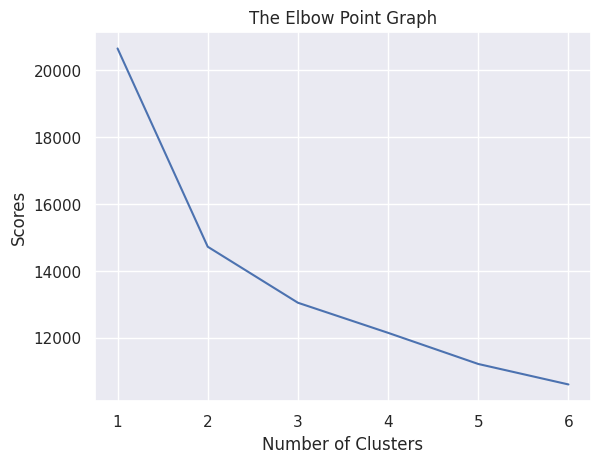

In [ ]:
scores = []
for i in range(1,7):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_final)
  scores.append(kmeans.inertia_)

f = plt.plot(range(1,7),scores)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

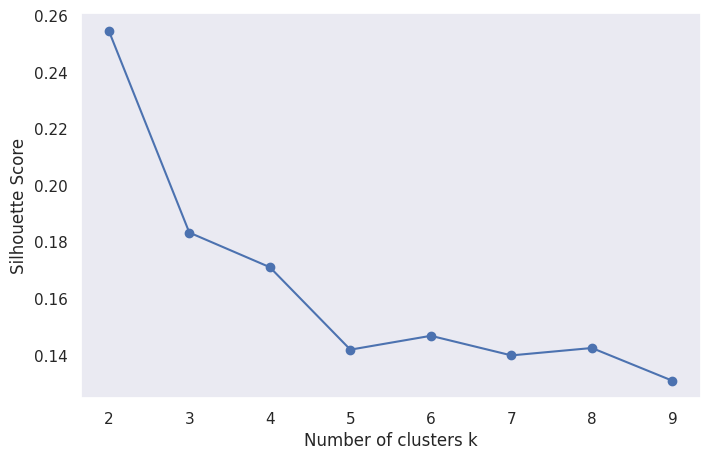

In [ ]:
sil_scores=[]
for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  labels=kmeans.fit_predict(data_final)
  sil_scores.append(silhouette_score(data_final,labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,10), sil_scores, marker = 'o', linestyle = '-',color = 'b')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,10))
plt.grid()
plt.show()

# **Model**

In [ ]:
kmeans = KMeans(n_clusters =3 , init = 'k-means++', random_state=0)
kmeans.fit(data_final)
labels = kmeans.labels_

In [ ]:
df_copy = df.copy()
df_copy['Cluster'] = kmeans.fit_predict(data_final)

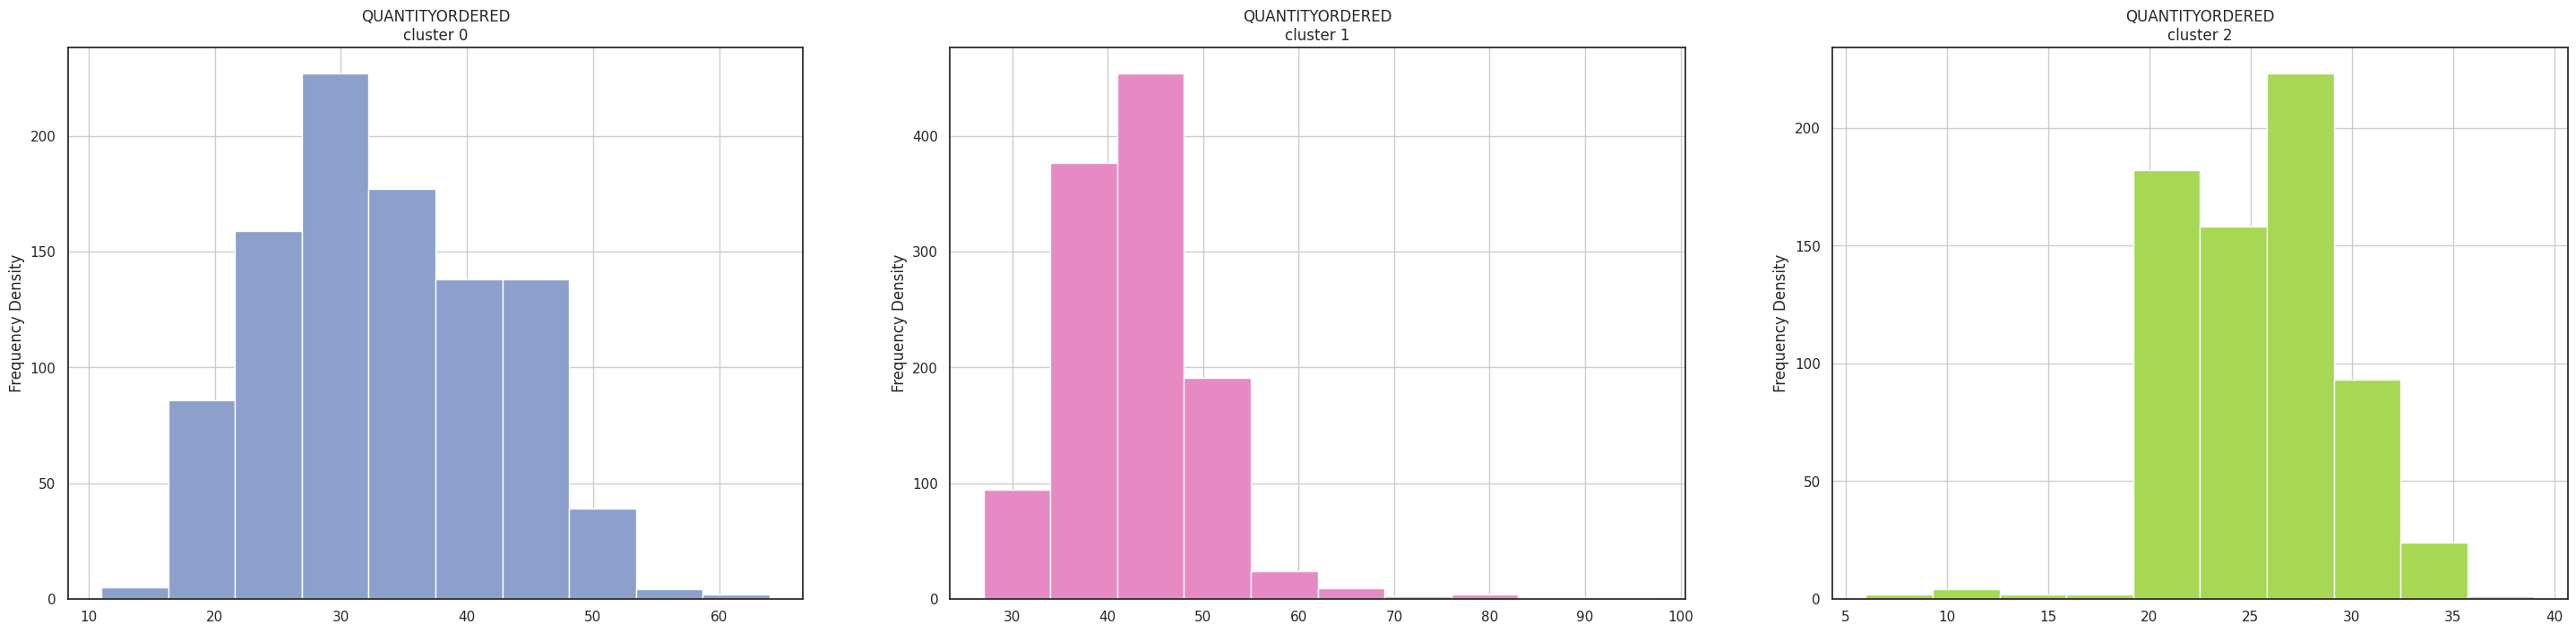

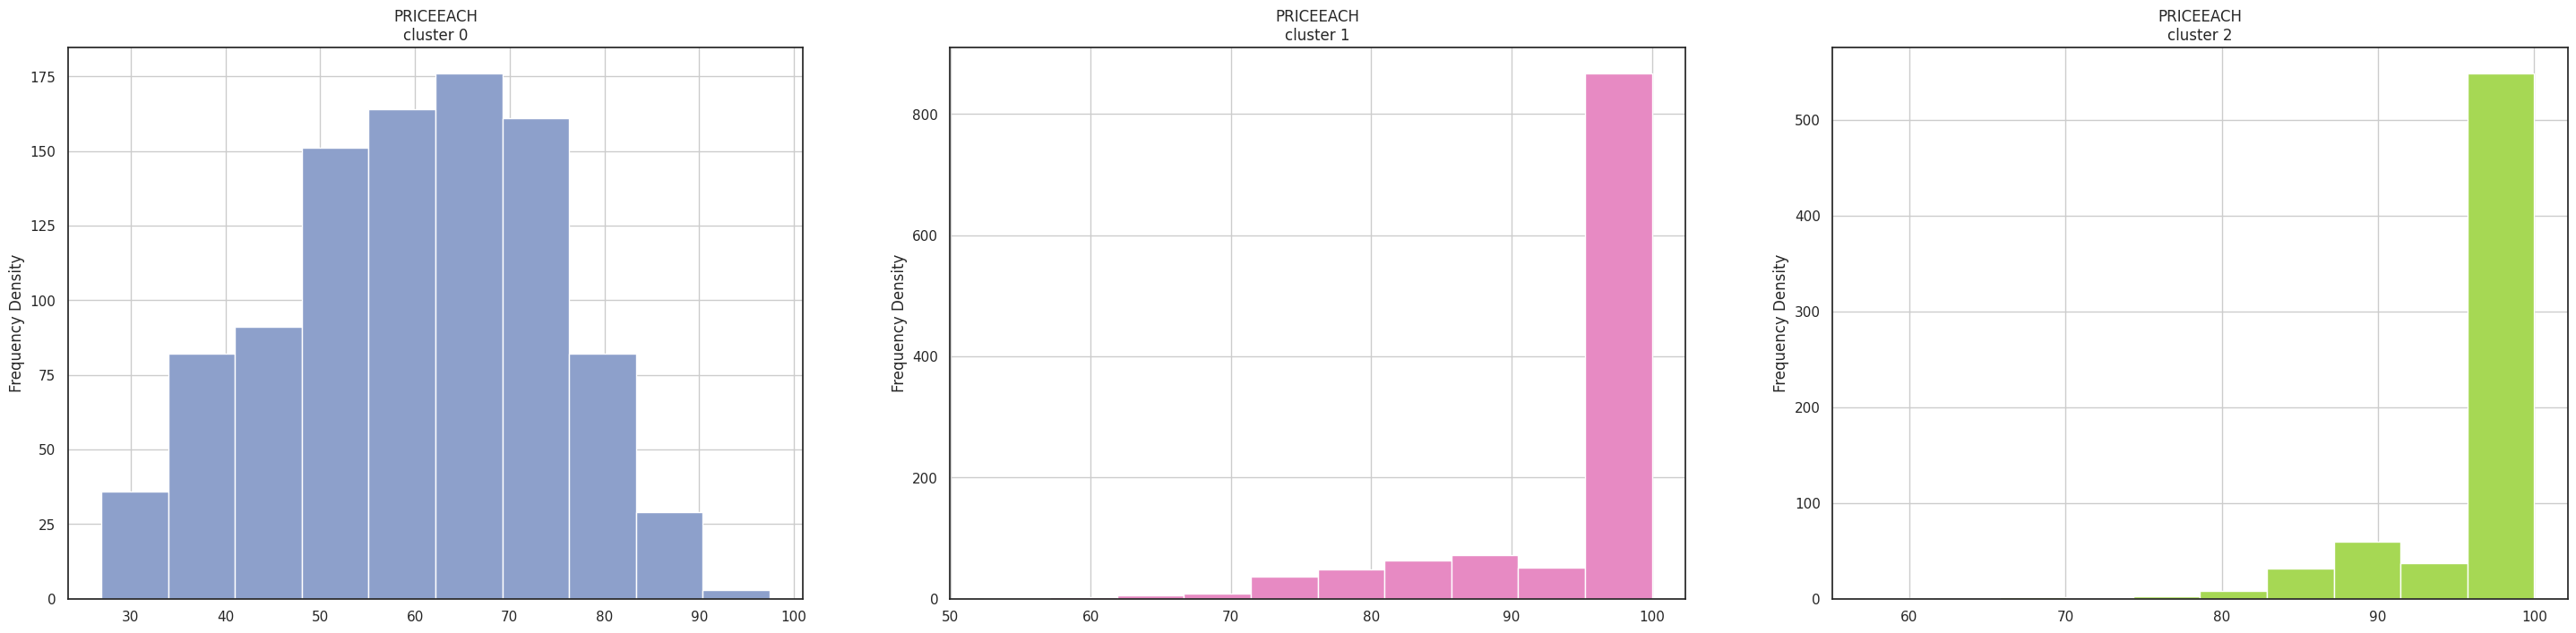

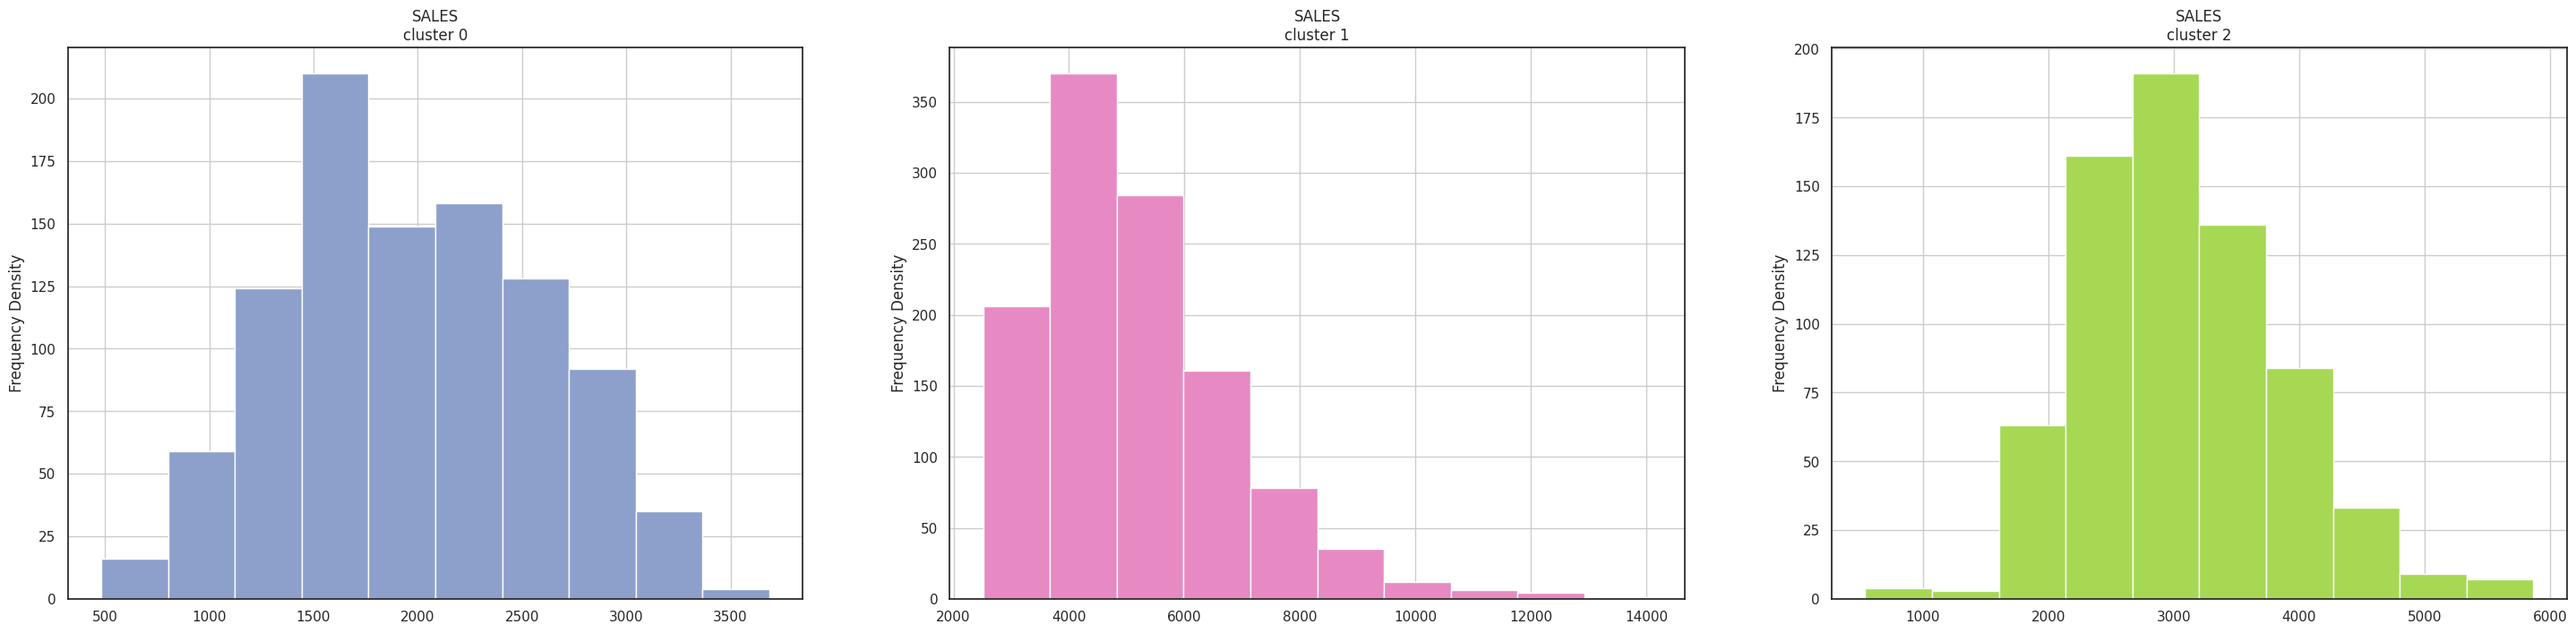

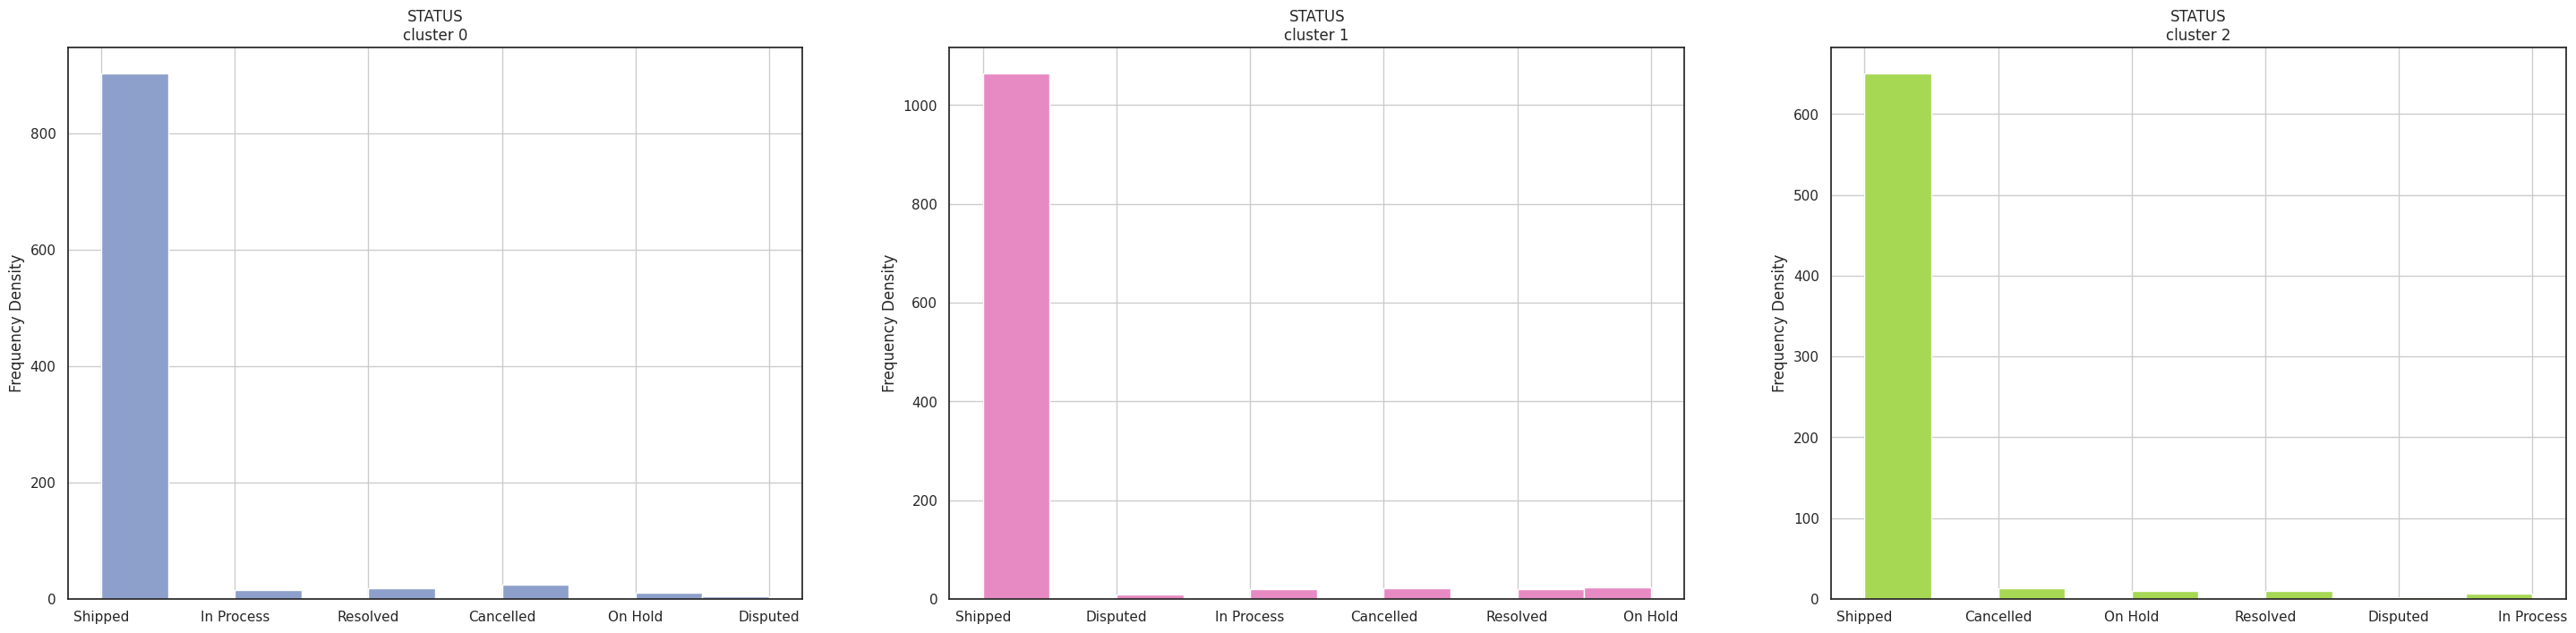

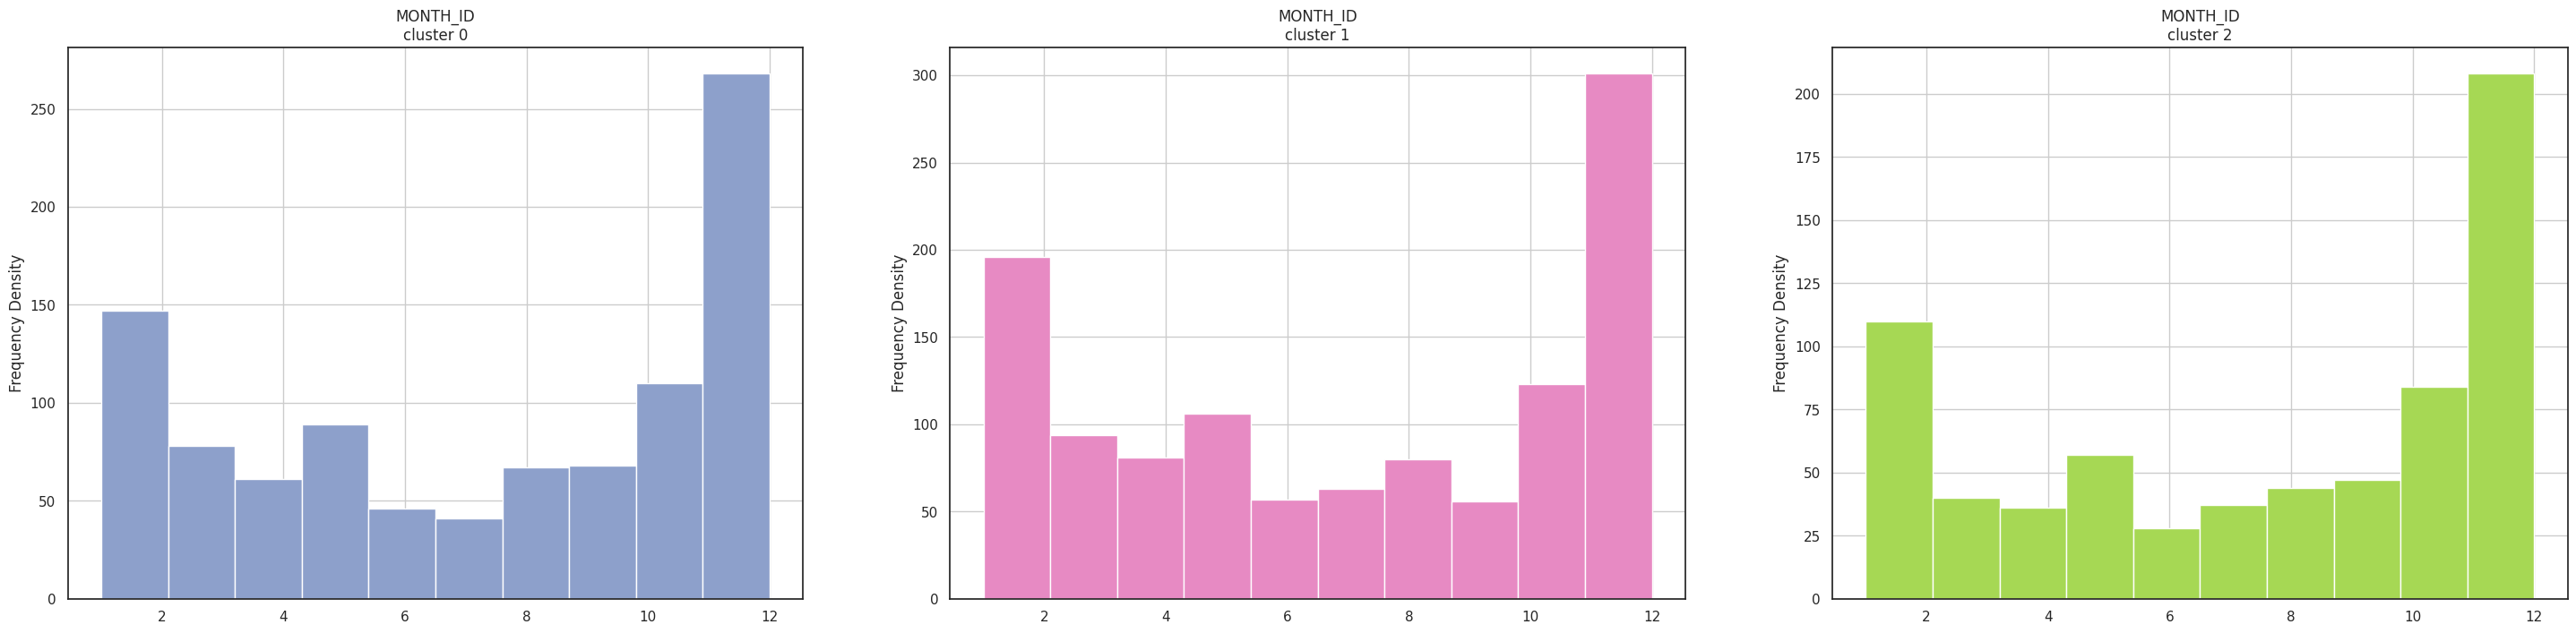

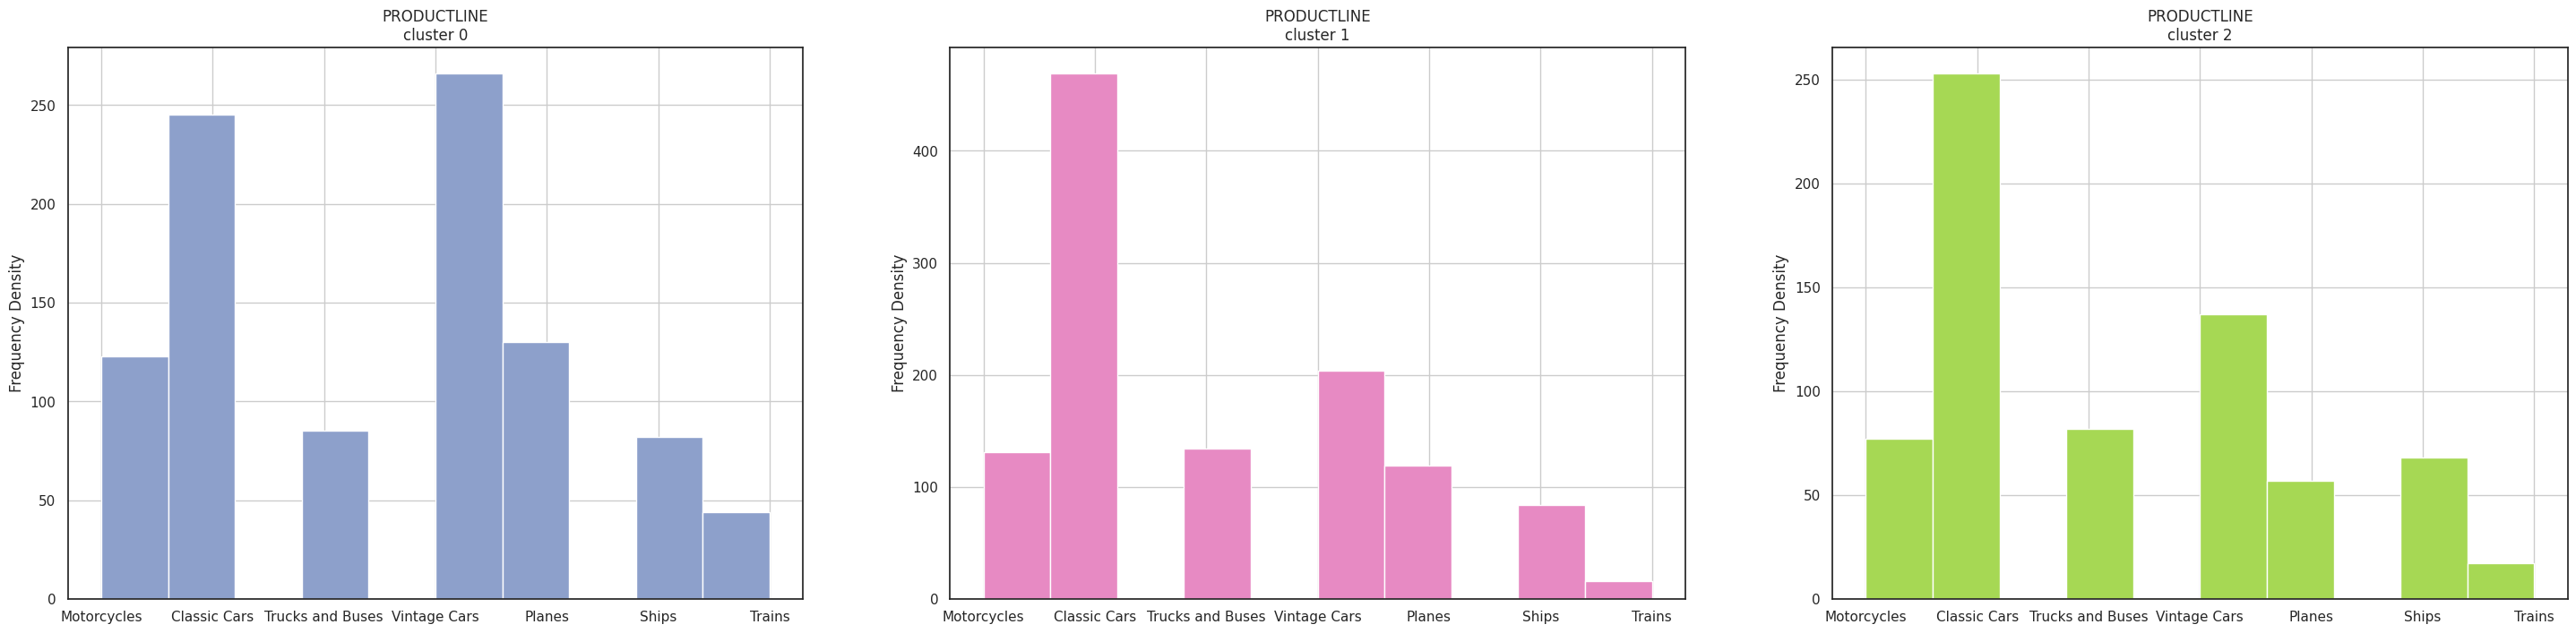

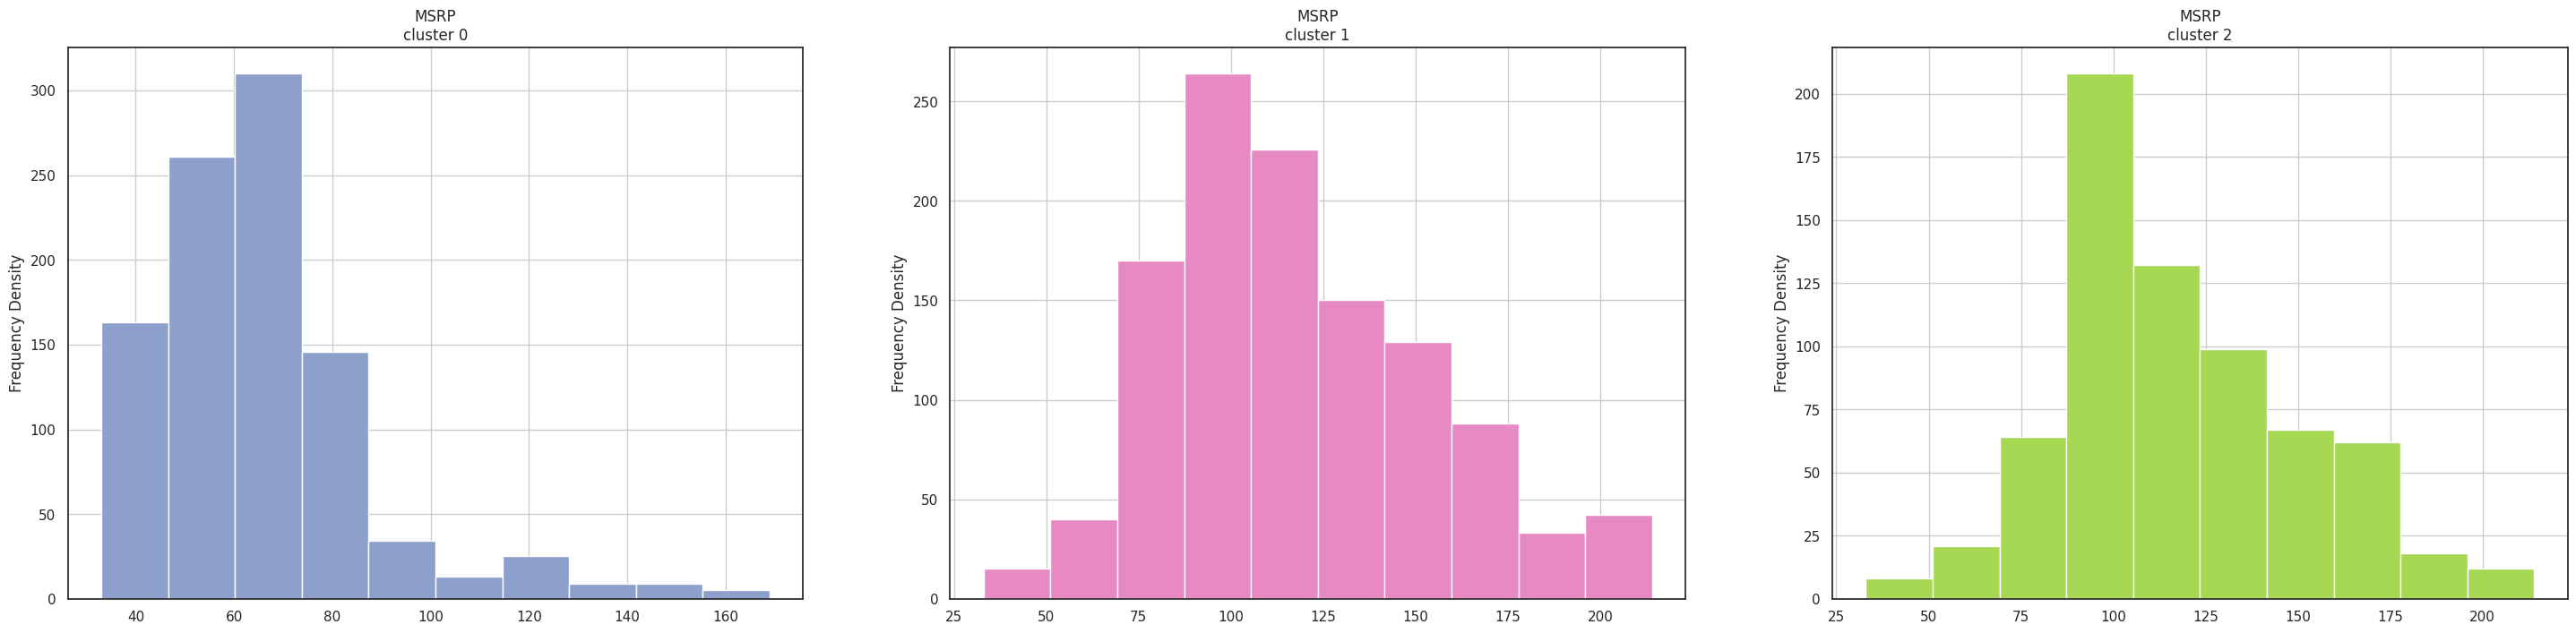

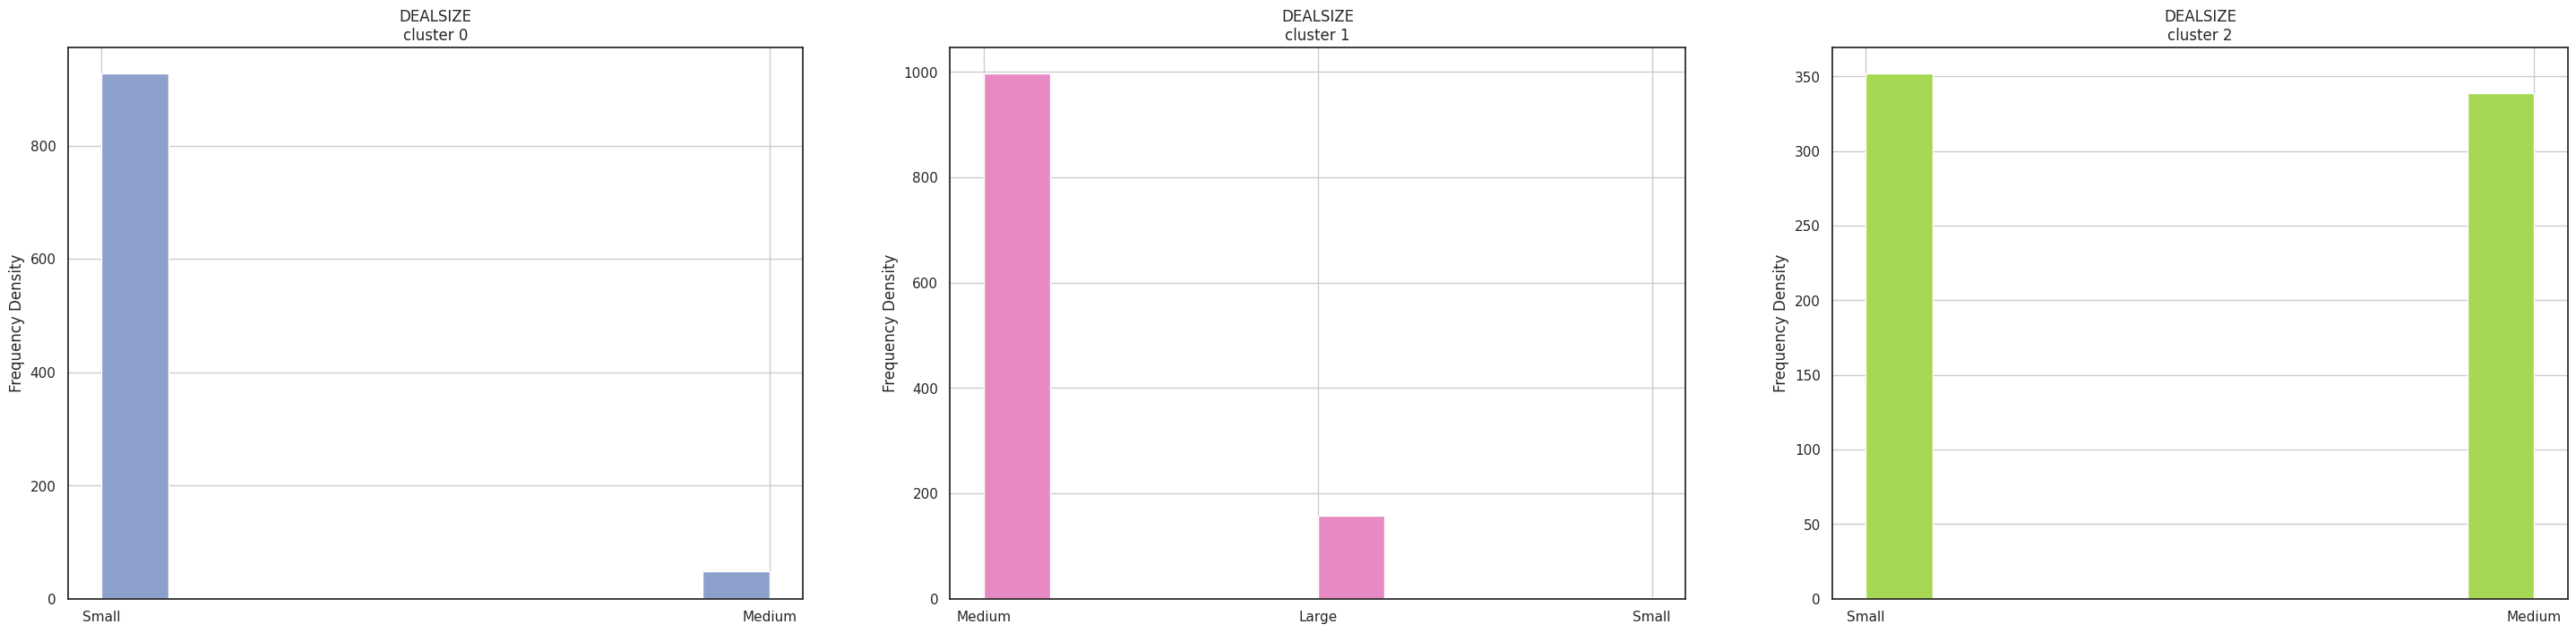

In [ ]:
import matplotlib as mpl
data = df_copy.drop('COUNTRY',axis=1).copy()
cmap1 = mpl.cm.Set2

for i in data.columns[:8]:
  plt.figure(figsize=(36,8))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = data[data['Cluster']==j]
    cluster[i].hist(color=cmap1(j+2))
    plt.ylabel('Frequency Density')
    plt.title('{}\ncluster {}'.format(i,j))
plt.show()

1. Cluster(0): In this group the quantity of goods ordered is about 30, the price of each good purchased is approximately 65 dollars.In addition, total purchases are approximately 1600 dollars, the largest purchases occur in December and the most consumed product line is vintage cars, and the agreements with these group are small.
2. Cluster(1): In the current group, the quantity of goods ordered is about 45, purchases more products in the range of 100 dollars, as well as having total purchases of about 4000 dollars. Their purchases occur more frequently in December and the most consumed product line is classic cars.The agreements with this group are medium-sized and little bit of large.
3. Cluster(2): In this group, the amount of merchandise ordered is about 27, buys more products in the range of 100 dollars, as well as having total purchases of about 3000 dollars. This group buys more in November and the most purchased product line is Classic cars. Agreements with this group are small to medium.

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import colorbar

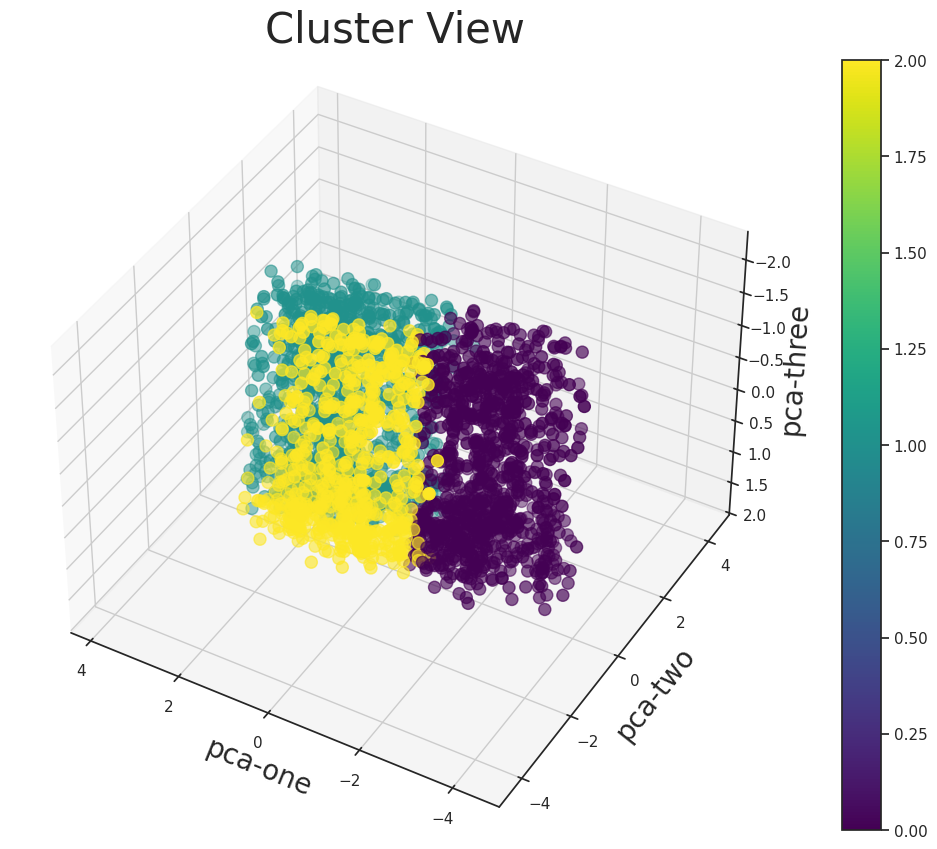

In [ ]:
sns.set_theme(style = 'white')
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(data_final)
thisdict = {'PCA1':principal_comp[:,0],'PCA2':principal_comp[:,1],'PCA3':principal_comp[:,2],'cluster':labels}
pca_df = pd.DataFrame(thisdict)
fig = plt.figure(figsize =(16,10))
ax=fig.add_subplot(111,projection = '3d')
p = ax.scatter(xs=pca_df['PCA1'],ys=pca_df['PCA2'],zs=pca_df['PCA3'],c=labels,s=75,cmap='viridis')
ax.set_xlabel('pca-one',fontsize=20)
ax.set_ylabel('pca-two',fontsize=20)
ax.set_zlabel('pca-three',fontsize=20)
ax.view_init(-140,60)
plt.title('Cluster View', fontsize=30, x=0.5, y=1.1)
fig.colorbar(p,ax=ax)
plt.show()

# To Deploy

In [ ]:
import pickle

In [ ]:
final_pipeline_with_prediction = Pipeline([
    ('Data_Preparation', full_pipeline),
    ('Kmeans',KMeans(n_clusters = 3 , init = 'k-means++', random_state=0))
])

final_pipeline_with_prediction.fit(df)

Pipeline(steps=[('Data_Preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID', 'MSRP'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE'], dtype='object'))])),
                ('Kmeans', KMeans(n_clusters=3, random_state=0))])

In [ ]:
model = final_pipeline_with_prediction
filename = 'trained_model.sav'
pickle.dump(model, open(filename,'wb'))

Final Model Check

In [ ]:
loadmodel = pickle.load(open(filename,'rb'))
Y = loadmodel.predict(df)
print(Y)

[2 0 1 ... 1 0 0]
